# Meat Price Index (Poultry, Pig, Bovine and Ovine)

### Time Series forecasting using Prophet; statistical comparison between Prophet, SARIMAX and LSTM RNN

In [93]:
#importing libraries
import pandas as pd
import numpy as np
from prophet import Prophet
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
import statsmodels.tsa.api as tsa
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Meat Price Index

In [2]:
df = pd.read_excel('Meat_Price_Index1.xlsx')
df.head()

,ds,y,Poultry Meat,Pig Meat,Bovine Meat,Ovine Meat
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [3]:
df = df.tail(-1)
df

,ds,y,Poultry Meat,Pig Meat,Bovine Meat,Ovine Meat
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [4]:
df = df[['ds', 'y']]
df

,ds,y
1,1990-01-01,73.374551
2,1990-02-01,75.956526
3,1990-03-01,77.805859
4,1990-04-01,80.442049
5,1990-05-01,80.994505
...,...,...
392,2022-08-01,121.094630
393,2022-09-01,120.276505
394,2022-10-01,116.833380
395,2022-11-01,115.186901


In [5]:
df.info()

#Y = Meat Price Index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 1 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      396 non-null    datetime64[ns]
 1   y       396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


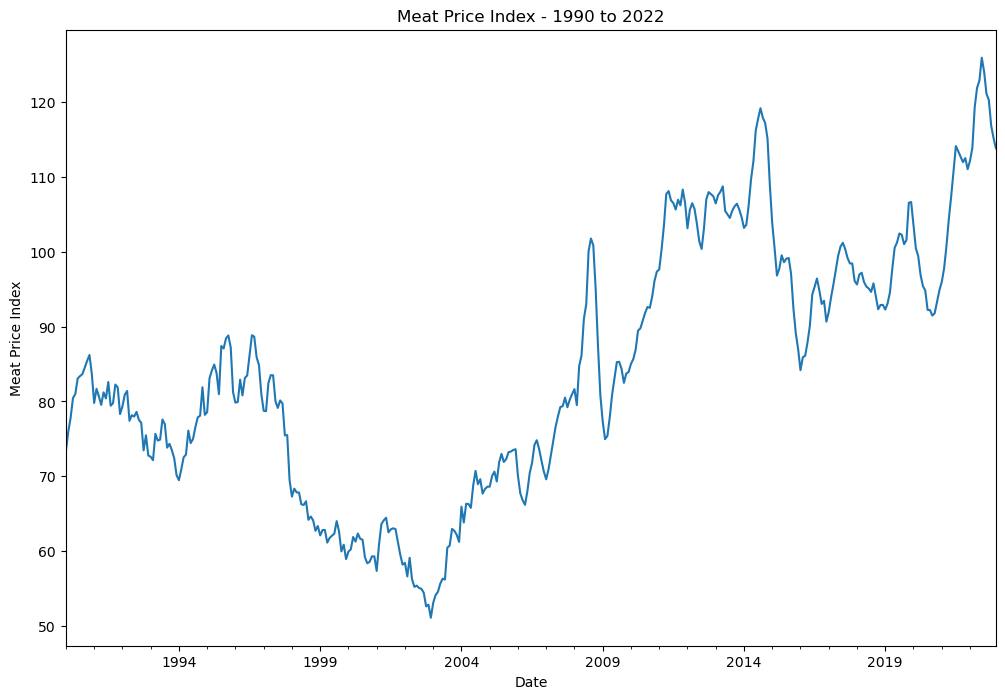

In [6]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Meat Price Index')
ax.set_xlabel('Date')
ax.set_title('Meat Price Index - 1990 to 2022')
ax.legend().set_visible(False)

#plt.savefig('Meat_Price_Index.png', dpi=300)

plt.show()

In [7]:
my_model = Prophet(interval_width=0.95)

In [8]:
my_model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [9]:
future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
future_dates.head()

,ds
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01


In [10]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


#ds: the datestamp of the forecasted value
#yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,79.054995,66.872256,91.108402
1,1990-02-01,79.611144,67.202526,92.235743
2,1990-03-01,80.637018,68.215117,92.925103
3,1990-04-01,81.389190,68.885948,92.949923
4,1990-05-01,82.217805,69.209659,95.109199


Text(0.5, 1.0, 'Forecast of Meat Price Index')

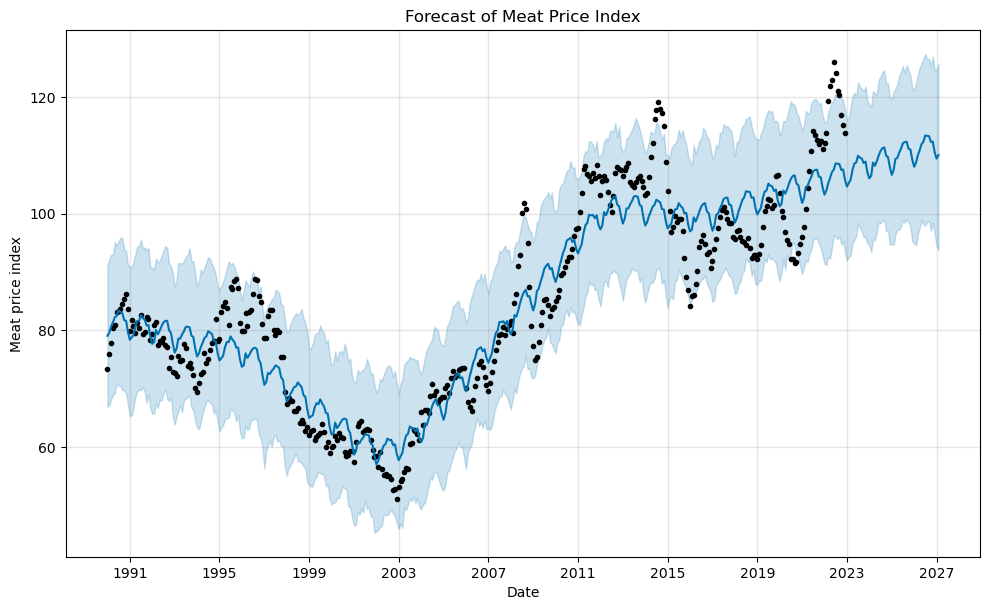

In [11]:
my_model.plot(forecast, uncertainty=True,  xlabel='Date', ylabel='Meat price index')
plt.title('Forecast of Meat Price Index')

#plt.savefig('Forecast of Meat_Price_Index.png', dpi=300)

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


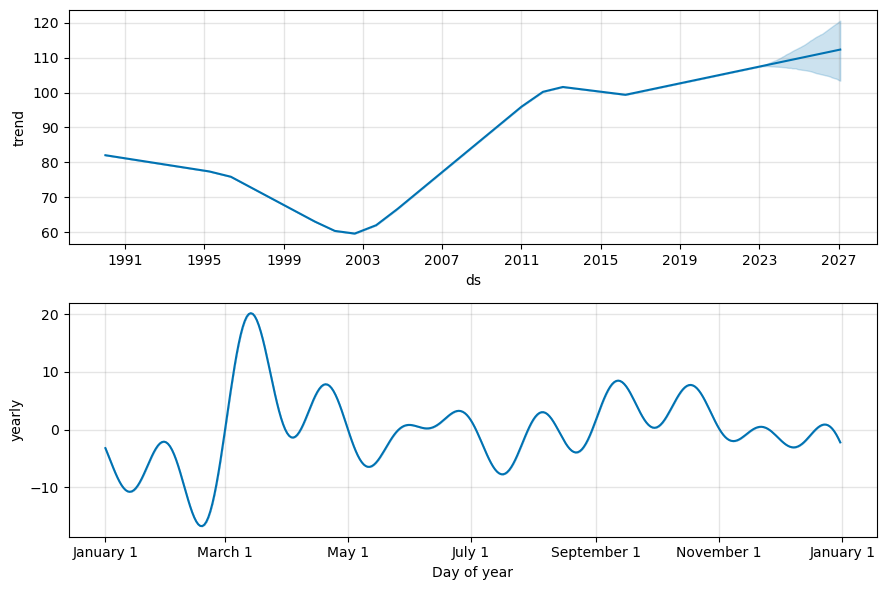

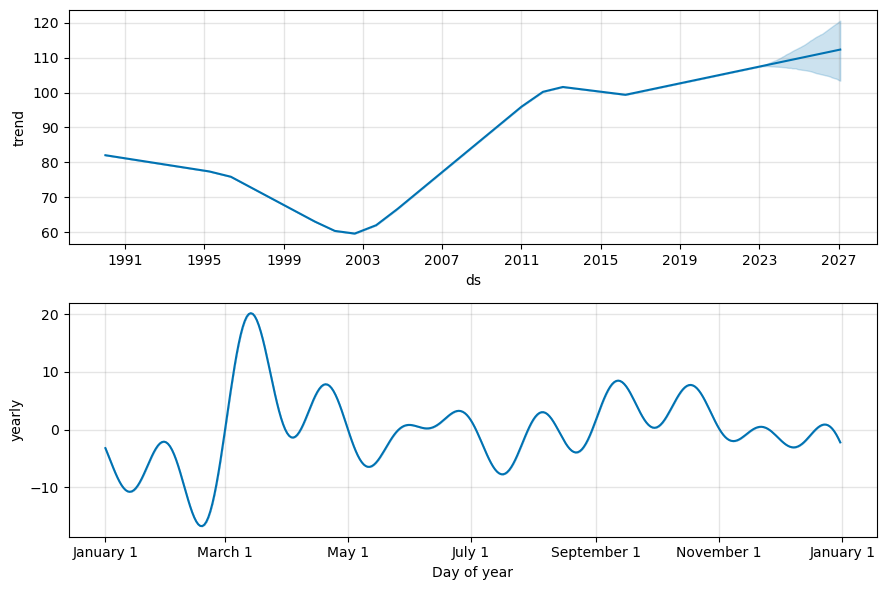

In [12]:
my_model.plot_components(forecast)
#plt.savefig('Components of Meat_Price_Index.png', dpi=300)

### Poultry meat

In [13]:
df1 = pd.read_excel('Meat_Price_Index2.xlsx')
df1.head()

,ds,Meat Price Index,y,Pig Meat,Bovine Meat,Ovine Meat
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [14]:
df1 = df1.tail(-1)
df1

,ds,Meat Price Index,y,Pig Meat,Bovine Meat,Ovine Meat
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [15]:
df1 = df1[['ds', 'y']]
df1

,ds,y
1,1990-01-01,75.893824
2,1990-02-01,70.596114
3,1990-03-01,75.024054
4,1990-04-01,72.116789
5,1990-05-01,71.007243
...,...,...
392,2022-08-01,129.166053
393,2022-09-01,126.820833
394,2022-10-01,124.155496
395,2022-11-01,123.188825


In [16]:
df1.info()

#Y = Poultry Meat 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 1 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      396 non-null    datetime64[ns]
 1   y       396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


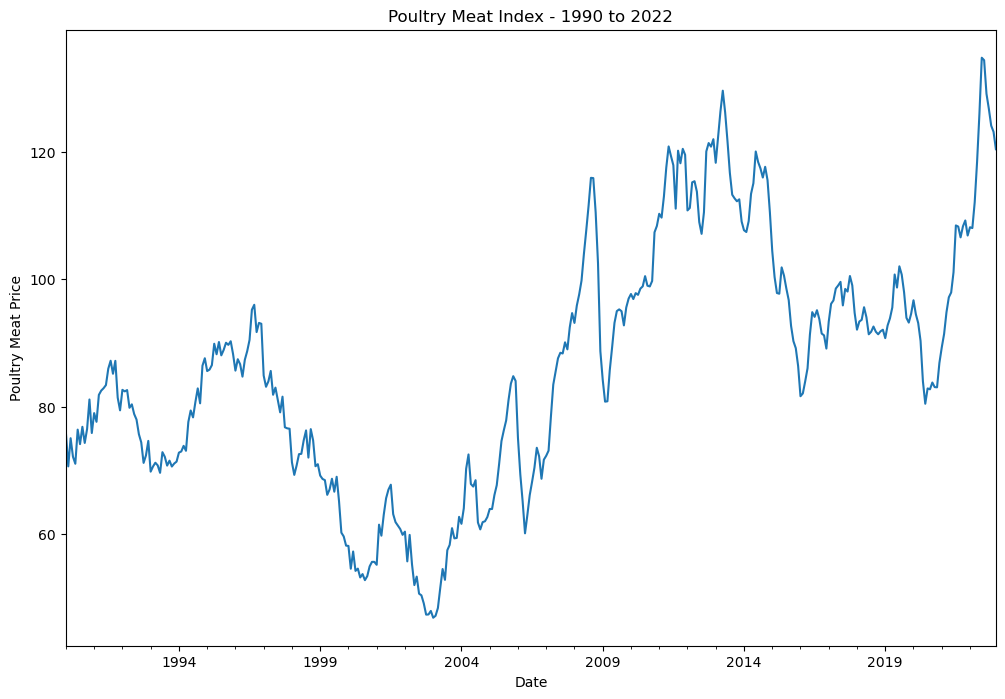

In [17]:
ax = df1.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Poultry Meat Price')
ax.set_xlabel('Date')
ax.set_title('Poultry Meat Index - 1990 to 2022')
ax.legend().set_visible(False)

#plt.savefig('Poultry_Meat_Price_Index.png', dpi=300)

plt.show()

In [18]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [19]:
future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
future_dates.head()

,ds
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01


In [20]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


#ds: the datestamp of the forecasted value
#yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,78.669130,60.008864,96.142304
1,1990-02-01,78.410085,60.425539,97.179419
2,1990-03-01,79.639792,61.104429,97.504033
3,1990-04-01,80.674018,62.177362,99.202869
4,1990-05-01,81.833237,63.773312,99.797040


Text(0.5, 1.0, 'Forecast of Poultry Meat Price Index')

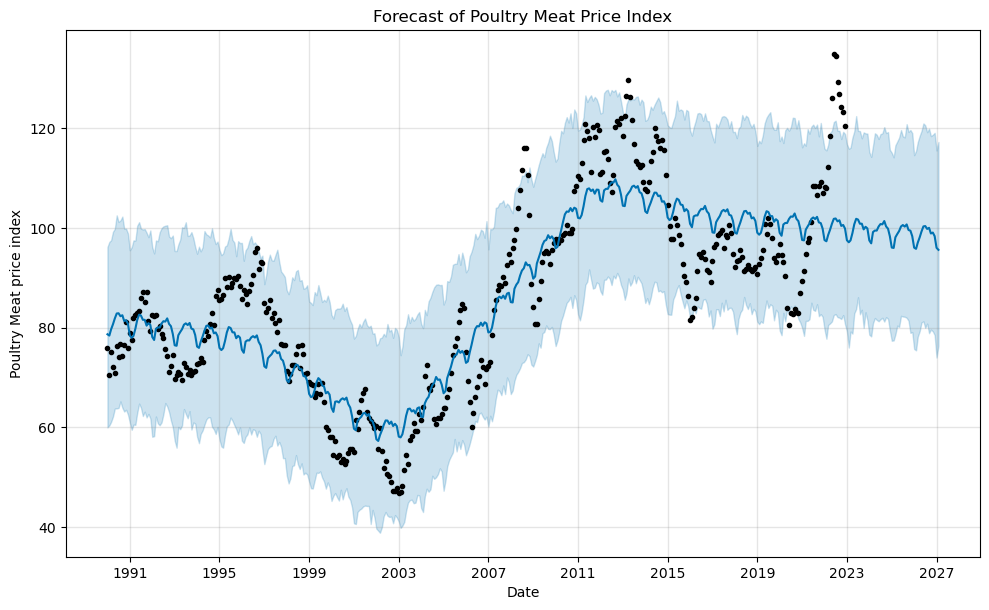

In [21]:
my_model.plot(forecast, uncertainty=True,  xlabel='Date', ylabel='Poultry Meat price index')
plt.title('Forecast of Poultry Meat Price Index')
#plt.savefig('Forecast of Poultry_Meat_Price_Index.png', dpi=300)

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


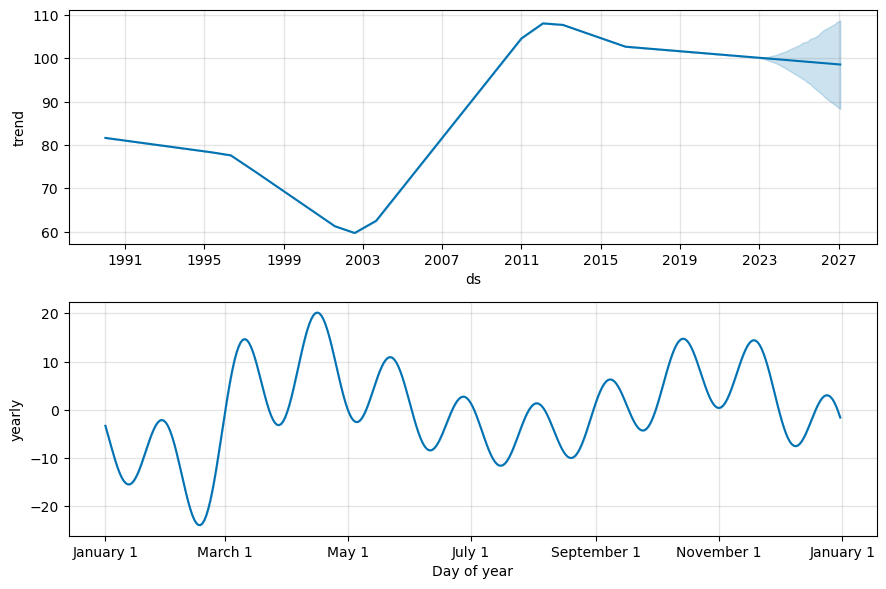

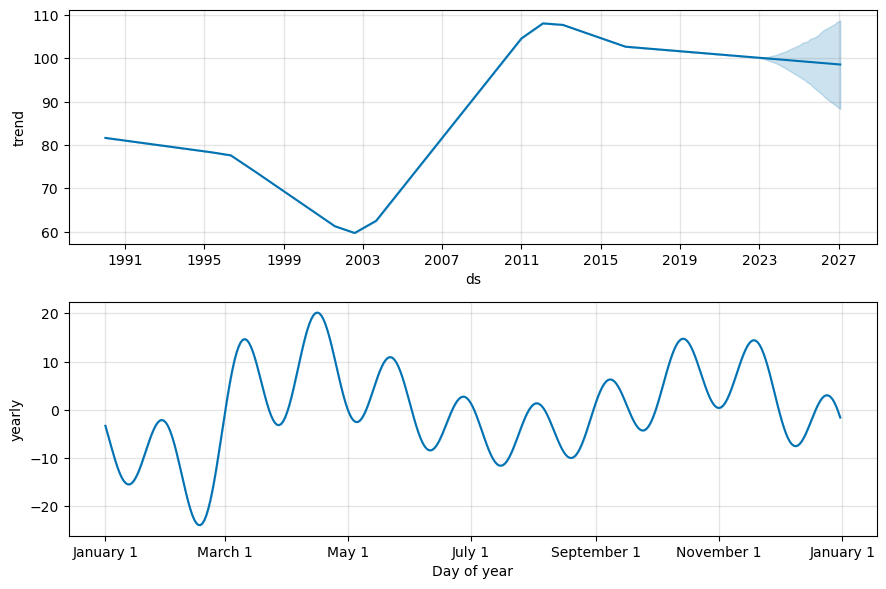

In [22]:
my_model.plot_components(forecast)
#plt.savefig('Components of Poultry_Meat_Price_Index.png', dpi=300)

### Pig meat

In [23]:
df2 = pd.read_excel('Meat_Price_Index3.xlsx')
df2.head()

,ds,Meat Price Index,Poultry Meat,y,Bovine Meat,Ovine Meat
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [24]:
df2 = df2.tail(-1)
df2

,ds,Meat Price Index,Poultry Meat,y,Bovine Meat,Ovine Meat
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [25]:
df2 = df2[['ds', 'y']]
df2

,ds,y
1,1990-01-01,102.090340
2,1990-02-01,113.180140
3,1990-03-01,115.179936
4,1990-04-01,122.269818
5,1990-05-01,128.454038
...,...,...
392,2022-08-01,106.448590
393,2022-09-01,109.262070
394,2022-10-01,105.698375
395,2022-11-01,106.512810


In [26]:
df2.info()

#Y = Pig Meat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 1 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      396 non-null    datetime64[ns]
 1   y       396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


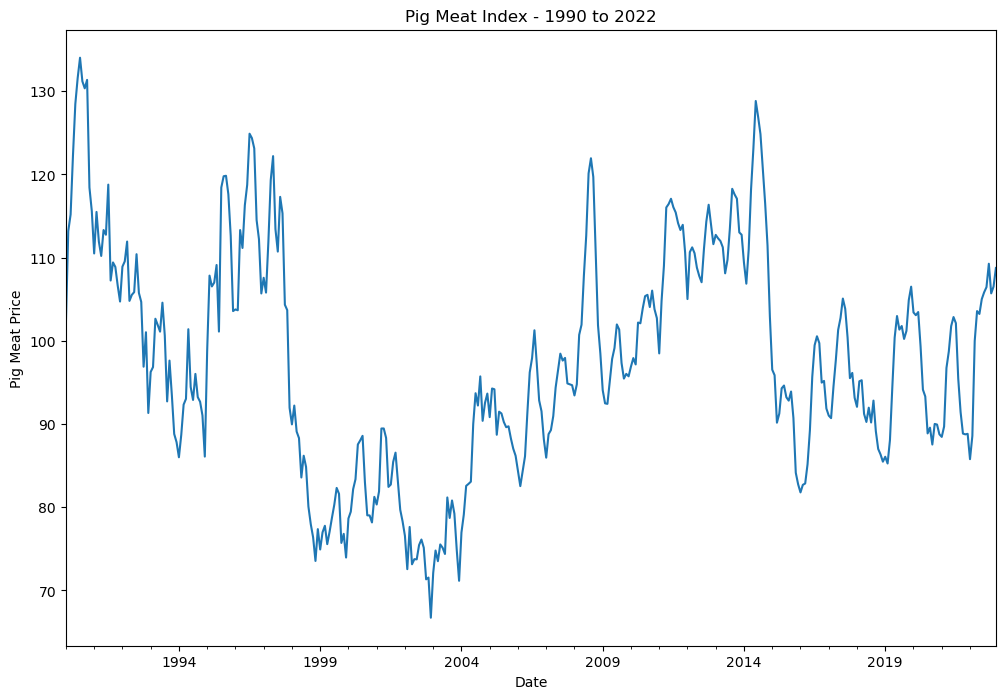

In [27]:
ax = df2.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Pig Meat Price')
ax.set_xlabel('Date')
ax.set_title('Pig Meat Index - 1990 to 2022')
ax.legend().set_visible(False)

#plt.savefig('Pig_Meat_Price_Index.png', dpi=300)

plt.show()

In [28]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [29]:
future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
future_dates.head()

,ds
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01


In [30]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


#ds: the datestamp of the forecasted value
#yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,111.580079,93.881990,129.824846
1,1990-02-01,112.592628,95.614575,129.515632
2,1990-03-01,114.636840,97.570857,132.287763
3,1990-04-01,115.918281,97.920272,133.531386
4,1990-05-01,117.815808,100.645618,135.529068


Text(0.5, 1.0, 'Forecast of Pig Meat Price Index')

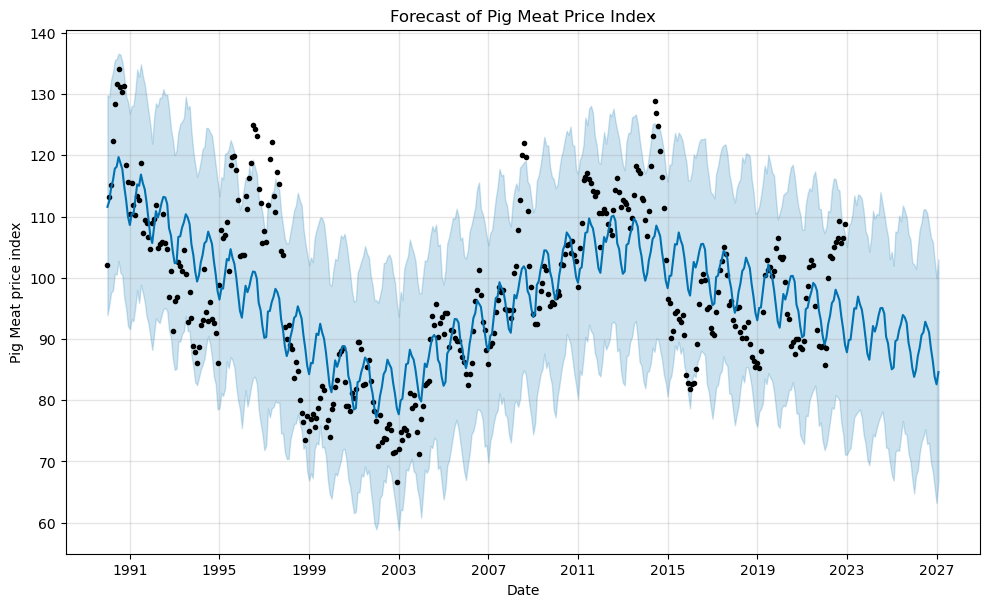

In [31]:
my_model.plot(forecast, uncertainty=True,  xlabel='Date', ylabel='Pig Meat price index')
plt.title('Forecast of Pig Meat Price Index')
#plt.savefig('Forecast of Pig_Meat_Price_Index.png', dpi=300)

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


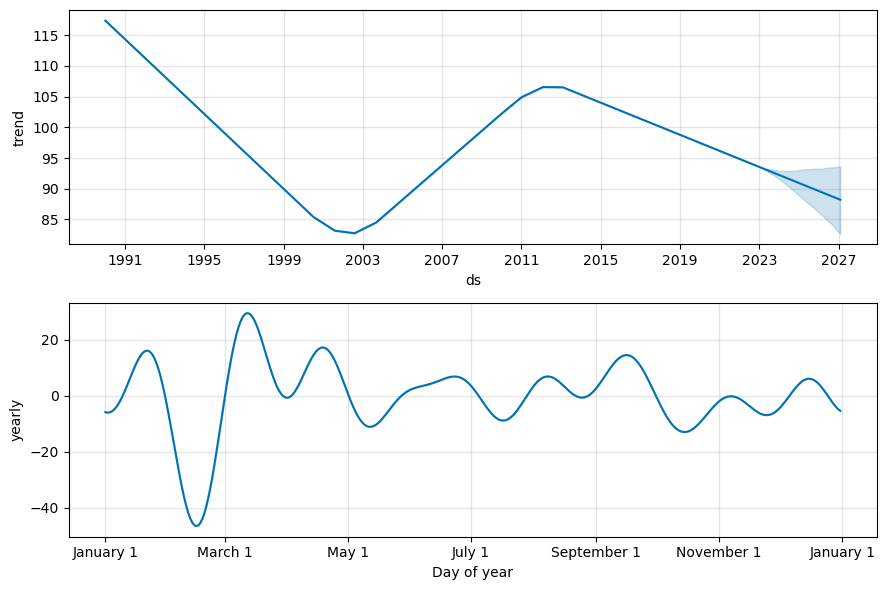

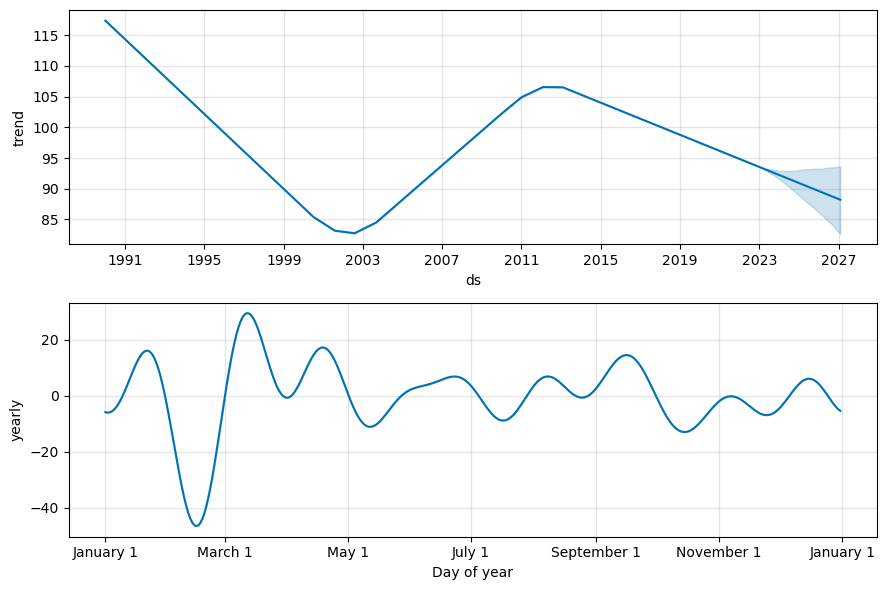

In [32]:
my_model.plot_components(forecast)
#plt.savefig('Components of Pig_Meat_Price_Index.png', dpi=300)

### Bovine meat

In [33]:
df3 = pd.read_excel('Meat_Price_Index4.xlsx')
df3.head()

,ds,Meat Price Index,Poultry Meat,Pig Meat,y,Ovine Meat
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [34]:
df3 = df3.tail(-1)
df3

,ds,Meat Price Index,Poultry Meat,Pig Meat,y,Ovine Meat
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [35]:
df3 = df3[['ds', 'y']]
df3

,ds,y
1,1990-01-01,53.970614
2,1990-02-01,55.057798
3,1990-03-01,55.411055
4,1990-04-01,58.182112
5,1990-05-01,55.095727
...,...,...
392,2022-08-01,126.347290
393,2022-09-01,124.176584
394,2022-10-01,120.578565
395,2022-11-01,115.986483


In [36]:
df3.info()

#Y = Bovine Meat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 1 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      396 non-null    datetime64[ns]
 1   y       396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


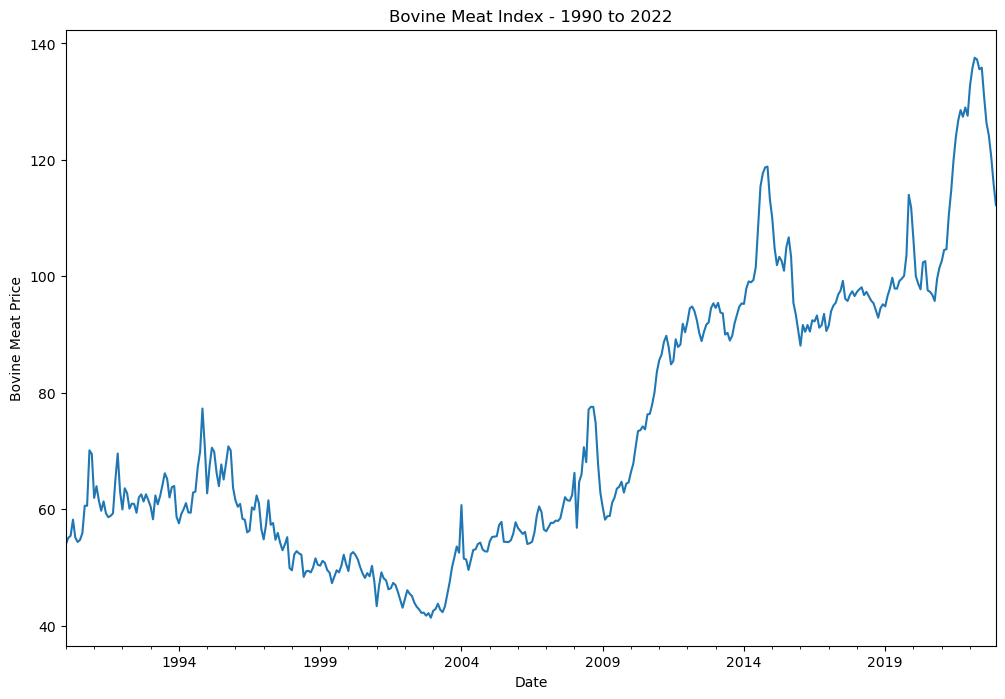

In [37]:
ax = df3.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Bovine Meat Price')
ax.set_xlabel('Date')
ax.set_title('Bovine Meat Index - 1990 to 2022')
ax.legend().set_visible(False)

#plt.savefig('Bovine_Meat_Price_Index.png', dpi=300)

plt.show()

In [38]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df3)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [39]:
future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
future_dates.head()

,ds
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01


In [40]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


#ds: the datestamp of the forecasted value
#yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,61.552445,48.640246,74.095455
1,1990-02-01,62.174103,48.362378,74.854861
2,1990-03-01,62.450284,49.650096,75.457173
3,1990-04-01,62.540110,49.623157,76.613484
4,1990-05-01,62.139058,47.992515,75.964254


Text(0.5, 1.0, 'Forecast of Bovine Meat Price Index')

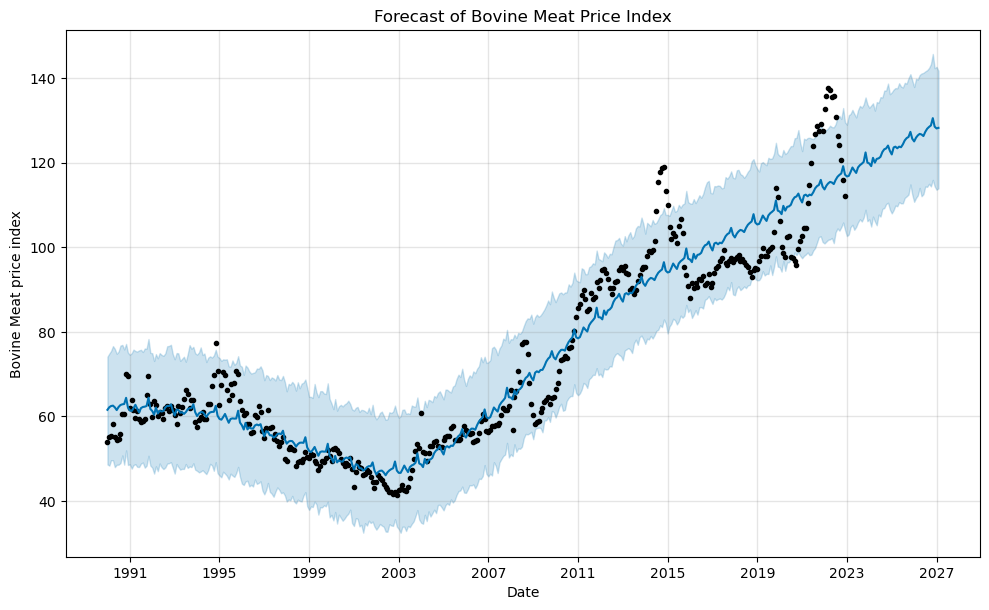

In [41]:
my_model.plot(forecast, uncertainty=True, xlabel='Date', ylabel='Bovine Meat price index')
plt.title('Forecast of Bovine Meat Price Index')
#plt.savefig('Forecast of Bovine_Meat_Price_Index.png', dpi=300)

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


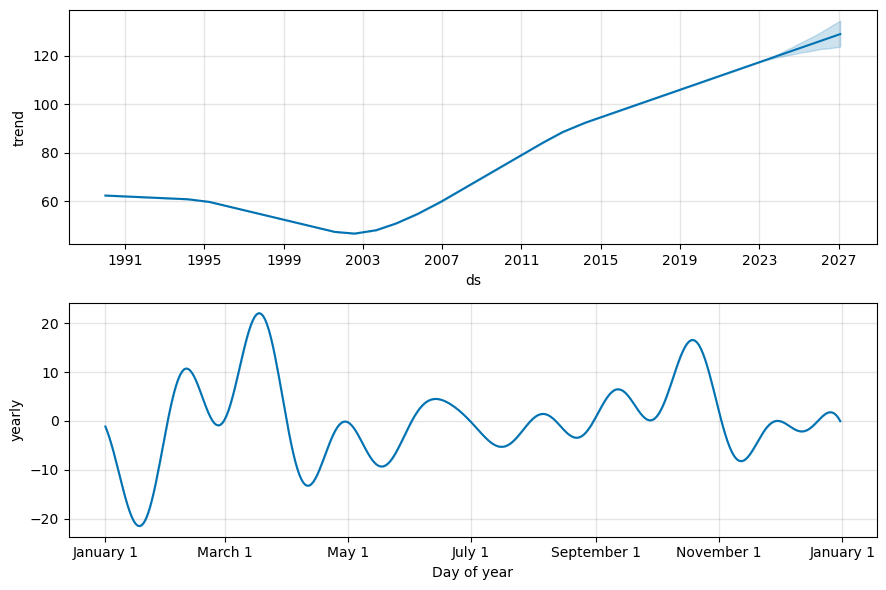

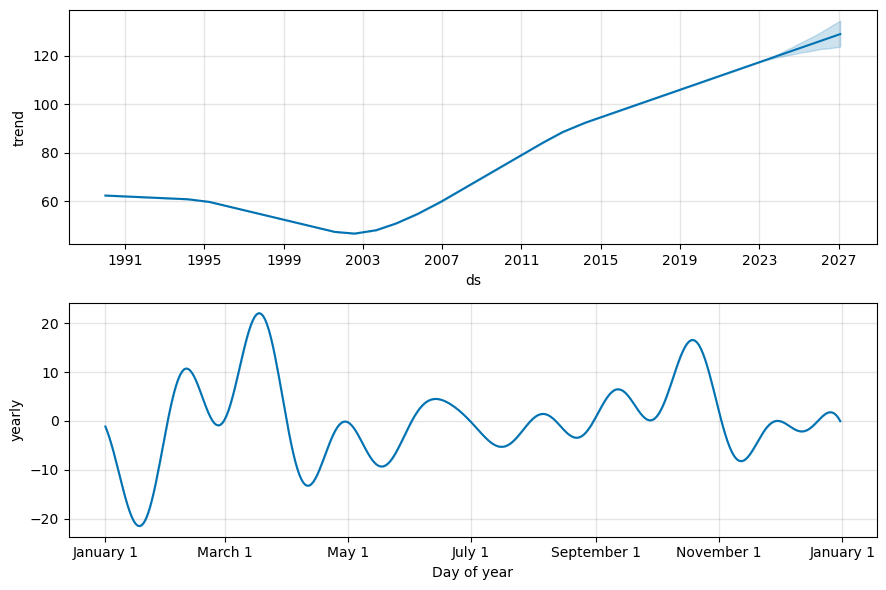

In [42]:
my_model.plot_components(forecast)
#plt.savefig('Components of Bovine_Meat_Price_Index.png', dpi=300)

### Ovine meat

In [43]:
df4 = pd.read_excel('Meat_Price_Index5.xlsx')
df4.head()

,ds,Meat Price Index,Poultry Meat,Pig Meat,Bovine Meat,y
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [44]:
df4 = df4.tail(-1)
df4

,ds,Meat Price Index,Poultry Meat,Pig Meat,Bovine Meat,y
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [45]:
df4 = df4[['ds', 'y']]
df4

,ds,y
1,1990-01-01,29.917755
2,1990-02-01,32.222947
3,1990-03-01,31.046829
4,1990-04-01,34.010648
5,1990-05-01,35.774826
...,...,...
392,2022-08-01,129.812434
393,2022-09-01,124.790306
394,2022-10-01,119.258673
395,2022-11-01,120.951079


In [46]:
df4.info()

#Y = Ovine Meat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 1 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      396 non-null    datetime64[ns]
 1   y       396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


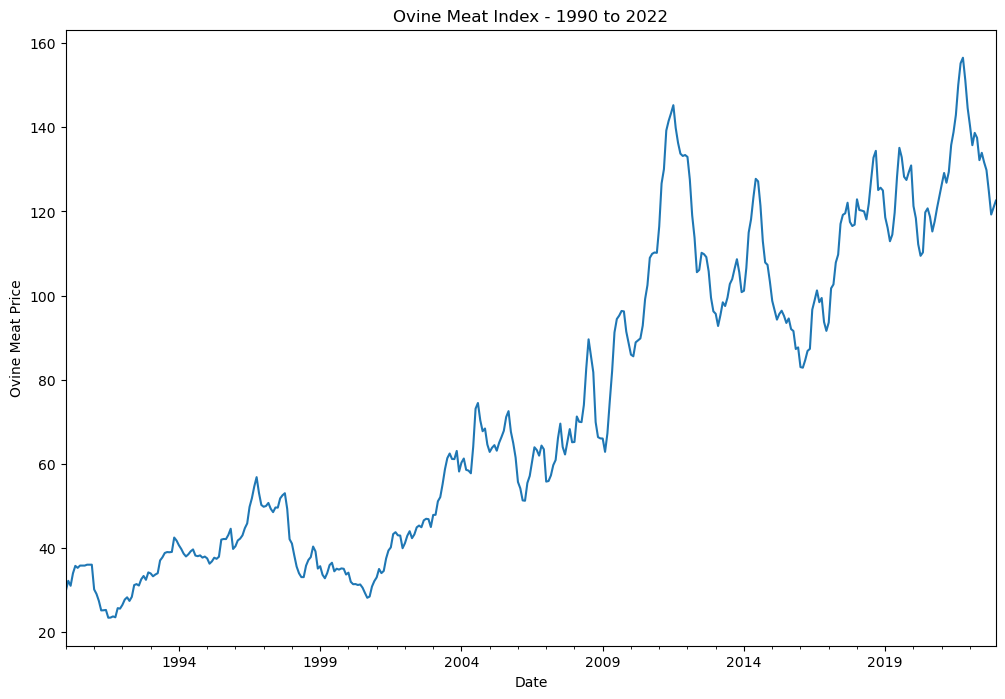

In [47]:
ax = df4.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Ovine Meat Price')
ax.set_xlabel('Date')
ax.set_title('Ovine Meat Index - 1990 to 2022')
ax.legend().set_visible(False)

#plt.savefig('Ovine_Meat_Price_Index.png', dpi=300)

plt.show()

In [48]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df4)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [49]:
future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
future_dates.head()

,ds
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01


In [50]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


#ds: the datestamp of the forecasted value
#yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,29.352318,7.480403,50.641625
1,1990-02-01,29.630213,8.085443,51.708246
2,1990-03-01,28.853922,7.972490,51.617891
3,1990-04-01,29.801834,7.569707,52.296690
4,1990-05-01,31.072085,10.366551,51.860090


Text(0.5, 1.0, 'Forecast of Ovine Meat Price Index')

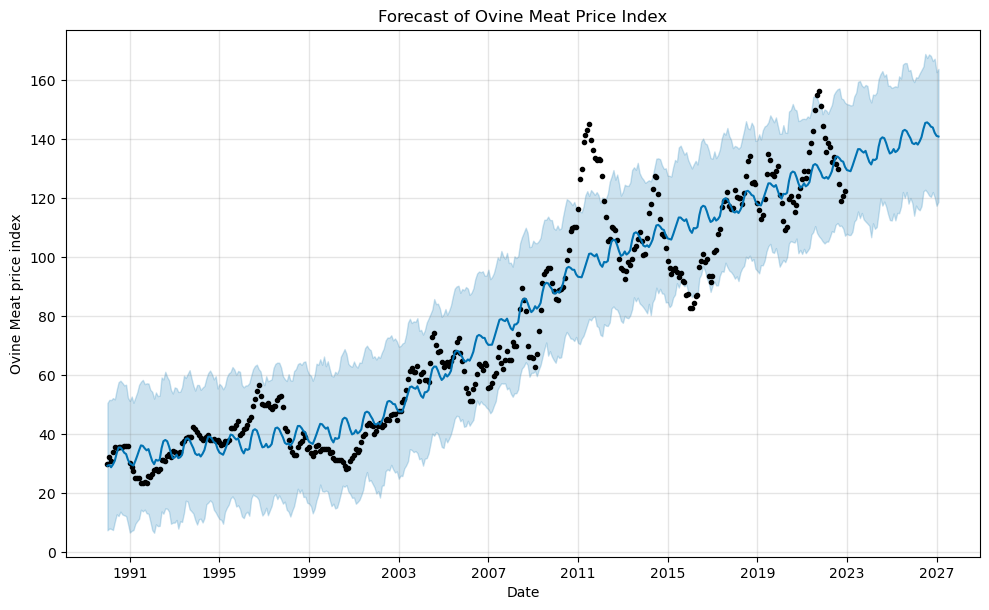

In [51]:
my_model.plot(forecast, uncertainty=True, xlabel='Date', ylabel='Ovine Meat price index')
plt.title('Forecast of Ovine Meat Price Index')
#plt.savefig('Forecast of Ovine_Meat_Price_Index.png', dpi=300)

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


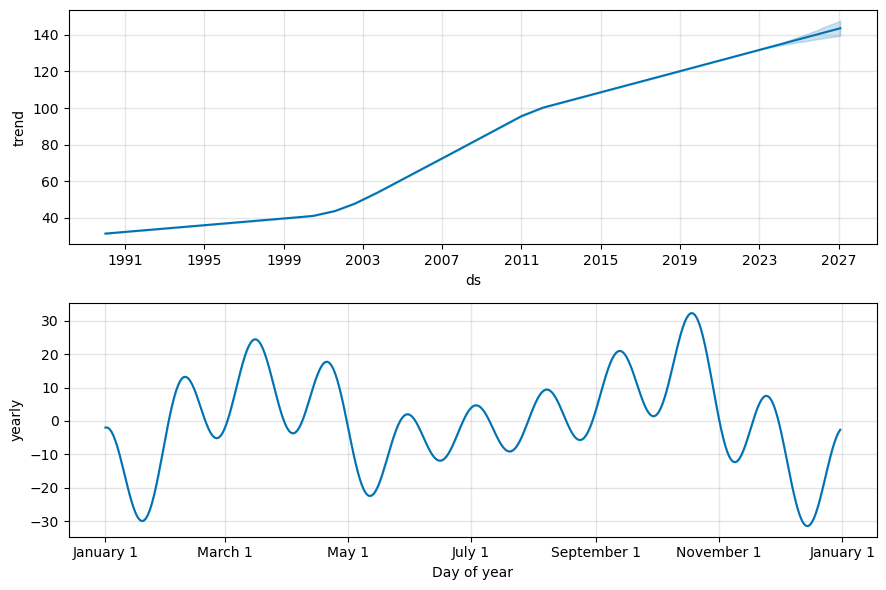

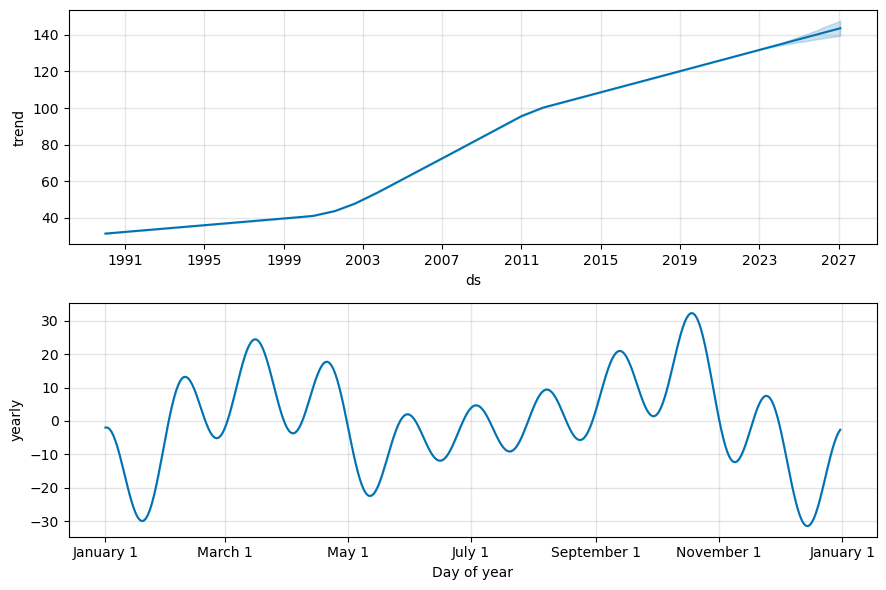

In [52]:
my_model.plot_components(forecast)
#plt.savefig('Components of Ovine_Meat_Price_Index.png', dpi=300)

### Prophet vs ARIMA

+ Prophet

1. Meat Price Index

In [53]:
# Evaluate the performance of the model
mae = (forecast['yhat'] - df['y']).abs().mean()
mse = ((forecast['yhat'] - df['y'])**2).mean()
rmse = ((forecast['yhat'] - df['y'])**2).mean() ** 0.5
mape = ((forecast['yhat'] - df['y']).abs() / df['y']).mean()

metrics = {
    'MAE': mae, #measures the average of the absolute differences between model predictions and actual values. The smaller the MAE, the better the model performance.
    'MSE': mse, #measures the average of the squared differences between model predictions and actual values. It is a metric sensitive to extreme values. The lower the MSE, the better the model performance.
    'RMSE': rmse, #is the square root of MSE. It is a more intuitive metric as it has the same unit of measurement as the original data. The lower the RMSE, the better the model performance.
    'MAPE': mape #measures the average of the percentage differences between model predictions and actual values. It is a metric that considers the magnitude of errors in relation to real values. The smaller the MAPE, the better the model performance.
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Performance metrics of the model:
MAE: 20.29
MSE: 660.11
RMSE: 25.69
MAPE: 0.25


In [54]:
df = pd.read_excel('Meat_Price_Index1.xlsx')
df = df.tail(-1)
df = df[['ds', 'y']]

my_model = Prophet(interval_width=0.95)
my_model.fit(df)

future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
forecast = my_model.predict(future_dates)

# Slice the forecast dataframe to exclude the projections
forecast_actual = forecast[forecast['ds'] <= df['ds'].max()]

# Evaluate the performance of the model
mae = (forecast_actual['yhat'] - df['y']).abs().mean()
mse = ((forecast_actual['yhat'] - df['y'])**2).mean()
rmse = ((forecast_actual['yhat'] - df['y'])**2).mean() ** 0.5
mape = ((forecast_actual['yhat'] - df['y']).abs() / df['y']).mean()
r2 = r2_score(df['y'], forecast_actual['yhat'])

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R-squared': r2
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Performance metrics of the model:
MAE: 5.22
MSE: 40.80
RMSE: 6.39
MAPE: 0.06
R-squared: 0.86


2. Poultry Meat

In [55]:
# Evaluate the performance of the model
mae = (forecast['yhat'] - df1['y']).abs().mean()
mse = ((forecast['yhat'] - df1['y'])**2).mean()
rmse = ((forecast['yhat'] - df1['y'])**2).mean() ** 0.5
mape = ((forecast['yhat'] - df1['y']).abs() / df1['y']).mean()

metrics = {
    'MAE': mae, #measures the average of the absolute differences between model predictions and actual values. The smaller the MAE, the better the model performance.
    'MSE': mse, #measures the average of the squared differences between model predictions and actual values. It is a metric sensitive to extreme values. The lower the MSE, the better the model performance.
    'RMSE': rmse, #is the square root of MSE. It is a more intuitive metric as it has the same unit of measurement as the original data. The lower the RMSE, the better the model performance.
    'MAPE': mape #measures the average of the percentage differences between model predictions and actual values. It is a metric that considers the magnitude of errors in relation to real values. The smaller the MAPE, the better the model performance.
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Performance metrics of the model:
MAE: 8.56
MSE: 113.26
RMSE: 10.64
MAPE: 0.10


In [56]:
df1 = pd.read_excel('Meat_Price_Index2.xlsx')
df1 = df1.tail(-1)
df1 = df1[['ds', 'y']]

my_model = Prophet(interval_width=0.95)
my_model.fit(df1)

future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
forecast = my_model.predict(future_dates)

# Slice the forecast dataframe to exclude the projections
forecast_actual = forecast[forecast['ds'] <= df1['ds'].max()]

# Evaluate the performance of the model
mae = (forecast_actual['yhat'] - df1['y']).abs().mean()
mse = ((forecast_actual['yhat'] - df1['y'])**2).mean()
rmse = ((forecast_actual['yhat'] - df1['y'])**2).mean() ** 0.5
mape = ((forecast_actual['yhat'] - df1['y']).abs() / df1['y']).mean()
r2 = r2_score(df1['y'], forecast_actual['yhat'])

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R-squared': r2
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Performance metrics of the model:
MAE: 7.68
MSE: 90.40
RMSE: 9.51
MAPE: 0.09
R-squared: 0.76


3. Pig Meat

In [57]:
# Evaluate the performance of the model
mae = (forecast['yhat'] - df2['y']).abs().mean()
mse = ((forecast['yhat'] - df2['y'])**2).mean()
rmse = ((forecast['yhat'] - df2['y'])**2).mean() ** 0.5
mape = ((forecast['yhat'] - df2['y']).abs() / df2['y']).mean()

metrics = {
    'MAE': mae, #measures the average of the absolute differences between model predictions and actual values. The smaller the MAE, the better the model performance.
    'MSE': mse, #measures the average of the squared differences between model predictions and actual values. It is a metric sensitive to extreme values. The lower the MSE, the better the model performance.
    'RMSE': rmse, #is the square root of MSE. It is a more intuitive metric as it has the same unit of measurement as the original data. The lower the RMSE, the better the model performance.
    'MAPE': mape #measures the average of the percentage differences between model predictions and actual values. It is a metric that considers the magnitude of errors in relation to real values. The smaller the MAPE, the better the model performance.
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Performance metrics of the model:
MAE: 15.04
MSE: 356.15
RMSE: 18.87
MAPE: 0.15


In [58]:
df2 = pd.read_excel('Meat_Price_Index3.xlsx')
df2 = df2.tail(-1)
df2 = df2[['ds', 'y']]

my_model = Prophet(interval_width=0.95)
my_model.fit(df2)

future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
forecast = my_model.predict(future_dates)

# Slice the forecast dataframe to exclude the projections
forecast_actual = forecast[forecast['ds'] <= df2['ds'].max()]

# Evaluate the performance of the model
mae = (forecast_actual['yhat'] - df2['y']).abs().mean()
mse = ((forecast_actual['yhat'] - df2['y'])**2).mean()
rmse = ((forecast_actual['yhat'] - df2['y'])**2).mean() ** 0.5
mape = ((forecast_actual['yhat'] - df2['y']).abs() / df2['y']).mean()
r2 = r2_score(df2['y'], forecast_actual['yhat'])

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R-squared': r2
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Performance metrics of the model:
MAE: 7.34
MSE: 84.51
RMSE: 9.19
MAPE: 0.08
R-squared: 0.55


4. Bovine Meat

In [59]:
# Evaluate the performance of the model
mae = (forecast['yhat'] - df3['y']).abs().mean()
mse = ((forecast['yhat'] - df3['y'])**2).mean()
rmse = ((forecast['yhat'] - df3['y'])**2).mean() ** 0.5
mape = ((forecast['yhat'] - df3['y']).abs() / df3['y']).mean()

metrics = {
    'MAE': mae, #measures the average of the absolute differences between model predictions and actual values. The smaller the MAE, the better the model performance.
    'MSE': mse, #measures the average of the squared differences between model predictions and actual values. It is a metric sensitive to extreme values. The lower the MSE, the better the model performance.
    'RMSE': rmse, #is the square root of MSE. It is a more intuitive metric as it has the same unit of measurement as the original data. The lower the RMSE, the better the model performance.
    'MAPE': mape #measures the average of the percentage differences between model predictions and actual values. It is a metric that considers the magnitude of errors in relation to real values. The smaller the MAPE, the better the model performance.
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Performance metrics of the model:
MAE: 28.76
MSE: 1071.86
RMSE: 32.74
MAPE: 0.48


In [60]:
df3 = pd.read_excel('Meat_Price_Index4.xlsx')
df3 = df3.tail(-1)
df3 = df3[['ds', 'y']]

my_model = Prophet(interval_width=0.95)
my_model.fit(df3)

future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
forecast = my_model.predict(future_dates)

# Slice the forecast dataframe to exclude the projections
forecast_actual = forecast[forecast['ds'] <= df3['ds'].max()]

# Evaluate the performance of the model
mae = (forecast_actual['yhat'] - df3['y']).abs().mean()
mse = ((forecast_actual['yhat'] - df3['y'])**2).mean()
rmse = ((forecast_actual['yhat'] - df3['y'])**2).mean() ** 0.5
mape = ((forecast_actual['yhat'] - df3['y']).abs() / df3['y']).mean()
r2 = r2_score(df3['y'], forecast_actual['yhat'])

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R-squared': r2
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Performance metrics of the model:
MAE: 5.29
MSE: 48.47
RMSE: 6.96
MAPE: 0.07
R-squared: 0.91


5. Ovine Meat

In [61]:
# Evaluate the performance of the model
mae = (forecast['yhat'] - df4['y']).abs().mean()
mse = ((forecast['yhat'] - df4['y'])**2).mean()
rmse = ((forecast['yhat'] - df4['y'])**2).mean() ** 0.5
mape = ((forecast['yhat'] - df4['y']).abs() / df4['y']).mean()

metrics = {
    'MAE': mae, #measures the average of the absolute differences between model predictions and actual values. The smaller the MAE, the better the model performance.
    'MSE': mse, #measures the average of the squared differences between model predictions and actual values. It is a metric sensitive to extreme values. The lower the MSE, the better the model performance.
    'RMSE': rmse, #is the square root of MSE. It is a more intuitive metric as it has the same unit of measurement as the original data. The lower the RMSE, the better the model performance.
    'MAPE': mape #measures the average of the percentage differences between model predictions and actual values. It is a metric that considers the magnitude of errors in relation to real values. The smaller the MAPE, the better the model performance.
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Performance metrics of the model:
MAE: 16.33
MSE: 408.30
RMSE: 20.21
MAPE: 0.30


In [62]:
df4 = pd.read_excel('Meat_Price_Index5.xlsx')
df4 = df4.tail(-1)
df4 = df4[['ds', 'y']]

my_model = Prophet(interval_width=0.95)
my_model.fit(df4)

future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
forecast = my_model.predict(future_dates)

# Slice the forecast dataframe to exclude the projections
forecast_actual = forecast[forecast['ds'] <= df4['ds'].max()]

# Evaluate the performance of the model
mae = (forecast_actual['yhat'] - df4['y']).abs().mean()
mse = ((forecast_actual['yhat'] - df4['y'])**2).mean()
rmse = ((forecast_actual['yhat'] - df4['y'])**2).mean() ** 0.5
mape = ((forecast_actual['yhat'] - df4['y']).abs() / df4['y']).mean()
r2 = r2_score(df4['y'], forecast_actual['yhat'])

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R-squared': r2
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Performance metrics of the model:
MAE: 8.35
MSE: 133.14
RMSE: 11.54
MAPE: 0.13
R-squared: 0.90


+ ARIMA

In [63]:
data = pd.read_excel('Meat_Price_Index.xlsx')
data.head()

,Date,Meat Price Index,Poultry Meat,Pig Meat,Bovine Meat,Ovine Meat
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [64]:
data = data.tail(-1)
data

,Date,Meat Price Index,Poultry Meat,Pig Meat,Bovine Meat,Ovine Meat
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [65]:
data = data[['Date', 'Meat Price Index']]

In [66]:
data = data.set_index(data['Date'])
data=data.drop(['Date'], axis=1)

In [67]:
data

,Meat Price Index
Date,
1990-01-01,73.374551
1990-02-01,75.956526
1990-03-01,77.805859
1990-04-01,80.442049
1990-05-01,80.994505
...,...
2022-08-01,121.094630
2022-09-01,120.276505
2022-10-01,116.833380


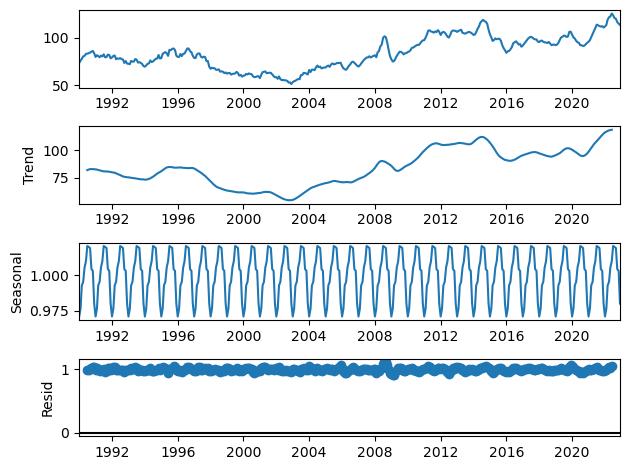

In [68]:
result = tsa.seasonal_decompose(data, model='multiplicative', period = 12)
figure=result.plot()

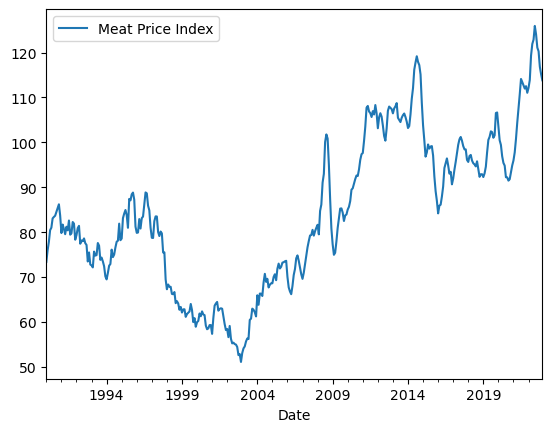

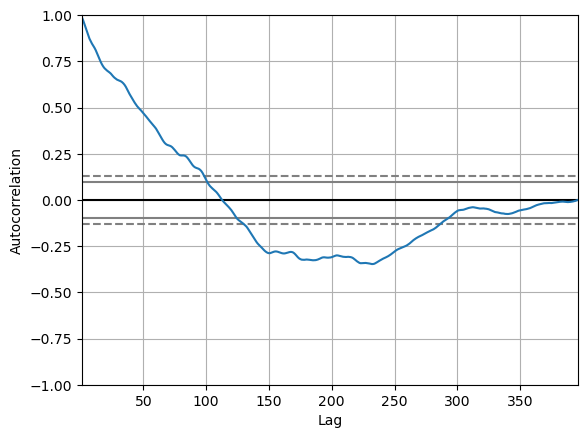

In [69]:
data = pd.read_excel('Meat_Price_Index.xlsx')
data = data.tail(-1)
data = data[['Date', 'Meat Price Index']]
data = data.set_index('Date')
data.plot()
plt.show()
autocorrelation_plot(data)
plt.show()

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  396
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -799.470
Date:                              Sun, 23 Apr 2023   AIC                           1612.941
Time:                                      20:24:00   BIC                           1640.793
Sample:                                  01-01-1990   HQIC                          1623.976
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4220      0.143      9.948      0.000       1.142       1.702
ar.L2         -0.71

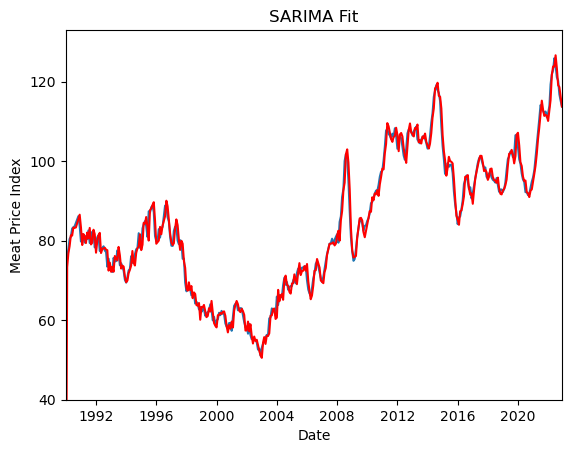

In [70]:
# Import data
data = pd.read_excel('Meat_Price_Index.xlsx')
data = data.set_index('Date')
data = data.dropna()
y = data['Meat Price Index']

# Find the best SARIMA model using auto_arima
model1 = pm.auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model1.summary())

# Plot the fitted values and actual values
plt.plot(y)
plt.plot(model1.predict_in_sample(), color='red')
plt.title('SARIMA Fit')
plt.xlabel('Date')
plt.ylabel('Meat Price Index')
plt.xlim(data.index[0], data.index[-1]) # Define the range of values on the x-axis.
plt.ylim(40, None) # Limit the y-axis from 50
plt.show()

In [71]:
####fit model
p = 2 #number of lags
d = 1 #degree of differencing
q = 2 #size of the moving average window

model = tsa.arima.ARIMA(data['Meat Price Index'], order=(p,d,q))
result = model.fit()

#summary of fit model
print(result.summary())

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       Meat Price Index   No. Observations:                  396
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -815.791
Date:                Sun, 23 Apr 2023   AIC                           1641.583
Time:                        20:24:00   BIC                           1661.477
Sample:                    01-01-1990   HQIC                          1649.465
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5859      0.057     27.929      0.000       1.475       1.697
ar.L2         -0.8775      0.052    -16.912      0.000      -0.979      -0.776
ma.L1         -1.3801      0.072    -19.040      0.0

In [74]:
data = data[['Meat Price Index']]

ARIMA (2,1,2)

In [81]:
# Train the ARIMA model
p = 2
d = 1
q = 2

model = ARIMA(data[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
# Make predictions on the test time series
# made by the model
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

In [83]:
actuals = data['2021-01-01':'2022-12-01']

In [84]:
mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

MAE: 18.77233382377527
MSE: 417.6442648636746
RMSE: 20.436346661369654
R²: -5.990110006506446


In [85]:
# Train the ARIMA model
p = 2
d = 1
q = 2

model = ARIMA(data[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

# Make predictions on the test time series
# made by the model
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data['2021-01-01':'2022-12-01']

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

MAE: 18.77233382377527
MSE: 417.6442648636746
RMSE: 20.436346661369654
R²: -5.990110006506446


C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Sarima(2,1,2)(1,0,1,12)

In [86]:
# Train the SARIMA model
p = 2
d = 1
q = 2
P = 1  # seasonal order
D = 0  # seasonal difference
Q = 1  # seasonal moving average order
s = 12  # seasonal period

model = SARIMAX(data[:'2020-12-01'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [87]:
# Make predictions on the test time series
# made by the model
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

In [88]:
actuals = data['2021-01-01':'2022-12-01']

In [89]:
mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

MAE: 17.832121943276846
MSE: 375.5950800671828
RMSE: 19.380275541570164
R²: -5.286333007420061


LSTM RNN

In [90]:
# Loading the data
data = pd.read_excel('Meat_Price_Index.xlsx', parse_dates=['Date'], index_col='Date')

# Removing null values
data.dropna(subset=['Meat Price Index'], inplace=True)

# Converting the date column to numerical values
data['days_since'] = (data.index - data.index.min()).days

# Separating data into training and test sets
train_data, test_data = train_test_split(data['Meat Price Index'], test_size=0.2, shuffle=False)

# Normalizing the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

# Preparing the data for the LSTM model
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data_scaled[i-60:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Creating the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Making predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Evaluating the model
mae = mean_absolute_error(test_data[60:], y_pred)
mse = mean_squared_error(test_data[60:], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[60:], y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

Epoch 1/50
4/4 [==============================] - 6s 54ms/step - loss: 0.1818
Epoch 2/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0447
Epoch 3/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0365
Epoch 4/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0166
Epoch 5/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0179
Epoch 6/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0188
Epoch 7/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0127
Epoch 8/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0122
Epoch 9/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0118
Epoch 10/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0098
Epoch 11/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0104
Epoch 12/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0096
Epoch 13/50
4/4 [==============================] - 0s 42ms/st

ARIMA/SARIMA in the base period 1990-2022 + 5-year projections (from 2023 to 2027)

In [94]:
start_date = data.index[0]
end_date = pd.to_datetime('2027-12-01')
prediction = model_fit.predict(start=start_date, end=end_date, dynamic=True)

actuals = data.loc[start_date:end_date, 'Meat Price Index']
mae = mean_absolute_error(actuals, prediction[-len(actuals):])
mse = mean_squared_error(actuals, prediction[-len(actuals):])
rmse = mean_squared_error(actuals, prediction[-len(actuals):], squared=False)
r2 = r2_score(actuals, prediction[-len(actuals):])
mape = mean_absolute_percentage_error(actuals, prediction[-len(actuals):])

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
print('MAPE:', mape)

MAE: 84.23989338972228
MSE: 7388.881720651917
RMSE: 85.95860469232802
R²: -24.259227137799762
MAPE: 1.0


--------------------------------------------------------------------

Poltry Meat

In [95]:
data1 = pd.read_excel('Meat_Price_Index.xlsx')
data1 = data1.tail(-1)
data1 = data1[['Date', 'Poultry Meat']]
data1 = data1.set_index(data1['Date'])
data1 = data1.drop(['Date'], axis=1)

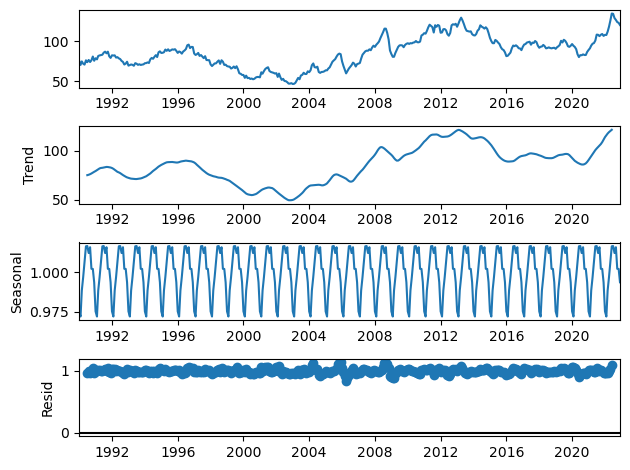

In [96]:
result = tsa.seasonal_decompose(data1, model='multiplicative', period = 12)
figure=result.plot()

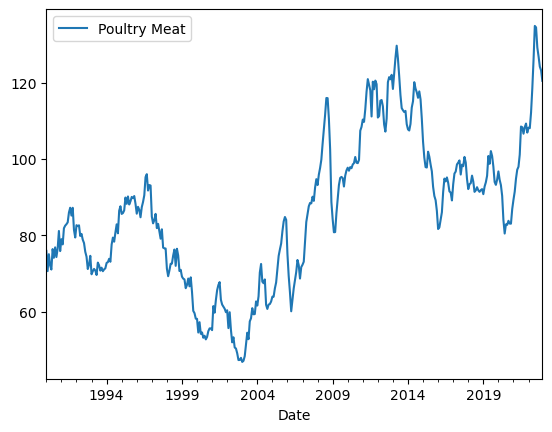

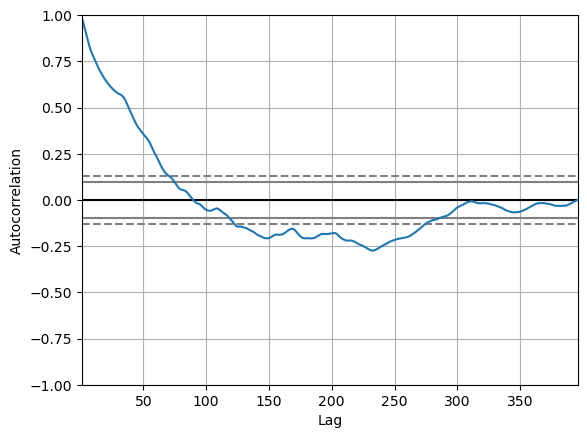

In [97]:
data1 = pd.read_excel('Meat_Price_Index.xlsx')
data1 = data1.tail(-1)
data1 = data1[['Date', 'Poultry Meat']]
data1 = data1.set_index('Date')
data1.plot()
plt.show()
autocorrelation_plot(data1)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  396
Model:               SARIMAX(4, 1, 0)   Log Likelihood                -976.852
Date:                Sun, 23 Apr 2023   AIC                           1963.704
Time:                        20:33:04   BIC                           1983.599
Sample:                    01-01-1990   HQIC                          1971.587
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2124      0.045      4.752      0.000       0.125       0.300
ar.L2          0.0949      0.052      1.833      0.067      -0.007       0.196
ar.L3          0.0548      0.054      1.016      0.3

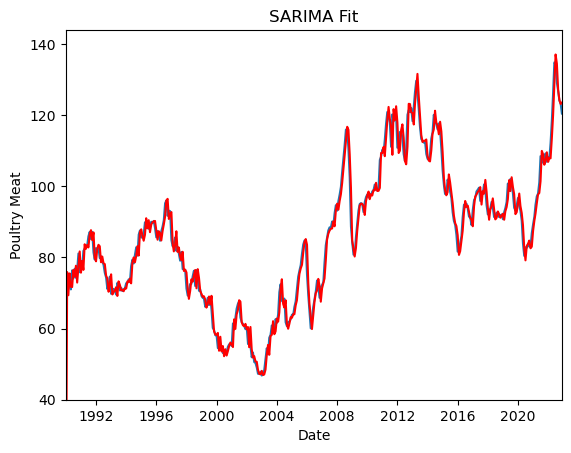

In [98]:
# Import data
data1 = pd.read_excel('Meat_Price_Index.xlsx')
data1 = data1.set_index('Date')
data1 = data1.dropna()
y = data1['Poultry Meat']

# Find the best SARIMA model using auto_arima
model1 = pm.auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model1.summary())

# Plot the fitted values and actual values
plt.plot(y)
plt.plot(model1.predict_in_sample(), color='red')
plt.title('SARIMA Fit')
plt.xlabel('Date')
plt.ylabel('Poultry Meat')
plt.xlim(data1.index[0], data1.index[-1]) # Define the range of values on the x-axis.
plt.ylim(40, None) # Limit the y-axis from 50
plt.show()

In [99]:
####fit model
p = 4 #number of lags
d = 1 #degree of differencing
q = 0 #size of the moving average window

model = tsa.arima.ARIMA(data1['Poultry Meat'], order=(p,d,q))
result = model.fit()

#summary of fit model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:           Poultry Meat   No. Observations:                  396
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -976.852
Date:                Sun, 23 Apr 2023   AIC                           1963.704
Time:                        20:33:05   BIC                           1983.599
Sample:                    01-01-1990   HQIC                          1971.587
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2124      0.045      4.752      0.000       0.125       0.300
ar.L2          0.0949      0.052      1.833      0.067      -0.007       0.196
ar.L3          0.0548      0.054      1.016      0.3

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [100]:
data1 = data1[['Poultry Meat']]

ARIMA(4,1,0)

In [101]:
# Train the ARIMA model
p = 4
d = 1
q = 0

model = ARIMA(data1[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

# Make predictions on the test time series
# made by the model
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data1['2021-01-01':'2022-12-01']

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

MAE: 24.4441557746883
MSE: 767.641440937327
RMSE: 27.70634297299676
R²: -3.57580827820842


C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


LSTM RNN

In [102]:
# Loading the data
data1 = pd.read_excel('Meat_Price_Index.xlsx', parse_dates=['Date'], index_col='Date')

# Removing null values
data1.dropna(subset=['Poultry Meat'], inplace=True)

# Converting the date column to numerical values
data1['days_since'] = (data1.index - data1.index.min()).days

# Separating data into training and test sets
train_data, test_data = train_test_split(data['Poultry Meat'], test_size=0.2, shuffle=False)

# Normalizing the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

# Preparing the data for the LSTM model
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data_scaled[i-60:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Creating the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Making predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Evaluating the model
mae = mean_absolute_error(test_data[60:], y_pred)
mse = mean_squared_error(test_data[60:], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[60:], y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

Epoch 1/50
4/4 [==============================] - 4s 51ms/step - loss: 0.1411
Epoch 2/50
4/4 [==============================] - 0s 49ms/step - loss: 0.0288
Epoch 3/50
4/4 [==============================] - 0s 51ms/step - loss: 0.0300
Epoch 4/50
4/4 [==============================] - 0s 50ms/step - loss: 0.0173
Epoch 5/50
4/4 [==============================] - 0s 52ms/step - loss: 0.0218
Epoch 6/50
4/4 [==============================] - 0s 47ms/step - loss: 0.0162
Epoch 7/50
4/4 [==============================] - 0s 50ms/step - loss: 0.0134
Epoch 8/50
4/4 [==============================] - 0s 48ms/step - loss: 0.0143
Epoch 9/50
4/4 [==============================] - 0s 50ms/step - loss: 0.0122
Epoch 10/50
4/4 [==============================] - 0s 48ms/step - loss: 0.0121
Epoch 11/50
4/4 [==============================] - 0s 51ms/step - loss: 0.0118
Epoch 12/50
4/4 [==============================] - 0s 49ms/step - loss: 0.0110
Epoch 13/50
4/4 [==============================] - 0s 49ms/st

ARIMA/SARIMA in the base period 1990-2022 + 5-year projections (from 2023 to 2027)

In [103]:
start_date = data1.index[0]
end_date = pd.to_datetime('2027-12-01')
prediction = model_fit.predict(start=start_date, end=end_date, dynamic=True)

actuals = data1.loc[start_date:end_date, 'Poultry Meat']
mae = mean_absolute_error(actuals, prediction[-len(actuals):])
mse = mean_squared_error(actuals, prediction[-len(actuals):])
rmse = mean_squared_error(actuals, prediction[-len(actuals):], squared=False)
r2 = r2_score(actuals, prediction[-len(actuals):])
mape = mean_absolute_percentage_error(actuals, prediction[-len(actuals):])

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
print('MAPE:', mape)

MAE: 86.1134226090331
MSE: 7792.9423655030905
RMSE: 88.27764363361253
R²: -19.647887229494735
MAPE: 1.0


Pig Meat

In [104]:
data2 = pd.read_excel('Meat_Price_Index.xlsx')
data2 = data2.tail(-1)
data2 = data2[['Date', 'Pig Meat']]
data2 = data2.set_index(data2['Date'])
data2 = data2.drop(['Date'], axis=1)

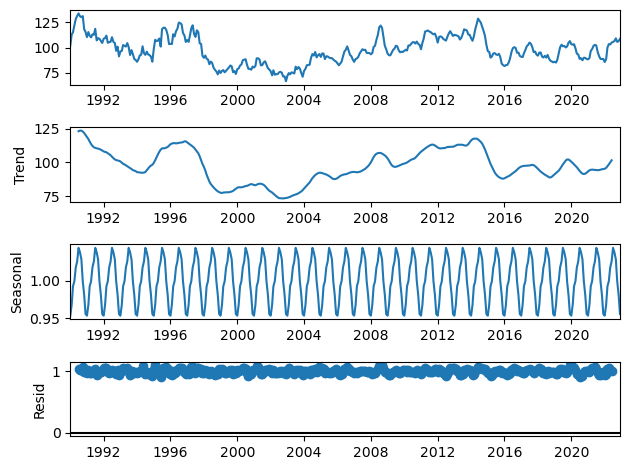

In [105]:
result = tsa.seasonal_decompose(data2, model='multiplicative', period = 12)
figure=result.plot()

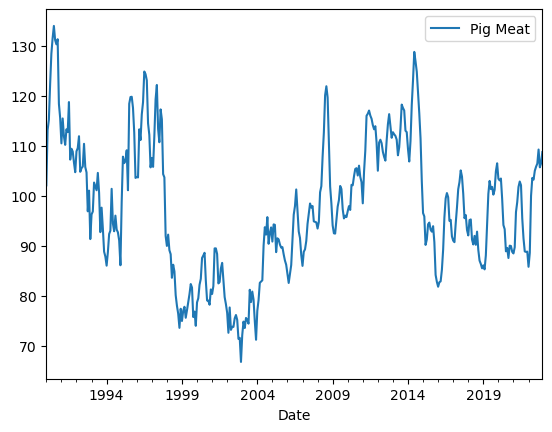

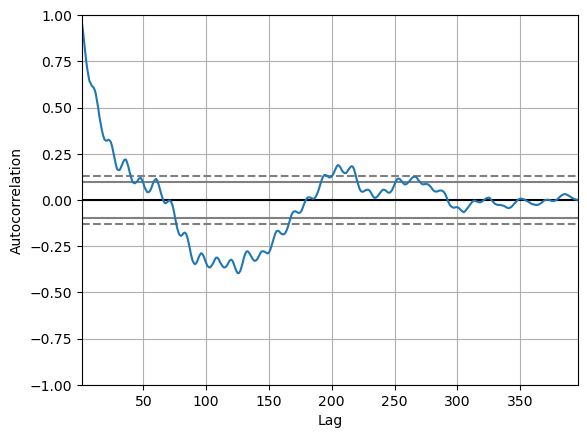

In [106]:
data2 = pd.read_excel('Meat_Price_Index.xlsx')
data2 = data2.tail(-1)
data2 = data2[['Date', 'Pig Meat']]
data2 = data2.set_index('Date')
data2.plot()
plt.show()
autocorrelation_plot(data2)
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  396
Model:             SARIMAX(2, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1079.847
Date:                            Sun, 23 Apr 2023   AIC                           2169.693
Time:                                    20:33:39   BIC                           2189.588
Sample:                                01-01-1990   HQIC                          2177.575
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0858      0.048      1.772      0.076      -0.009       0.181
ar.L2          0.1022      0.051   

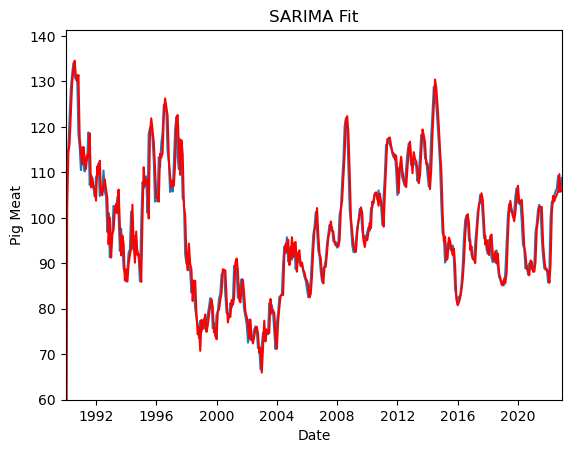

In [107]:
# Import data
data2 = pd.read_excel('Meat_Price_Index.xlsx')
data2 = data2.set_index('Date')
data2 = data2.dropna()
y = data2['Pig Meat']

# Find the best SARIMA model using auto_arima
model1 = pm.auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model1.summary())

# Plot the fitted values and actual values
plt.plot(y)
plt.plot(model1.predict_in_sample(), color='red')
plt.title('SARIMA Fit')
plt.xlabel('Date')
plt.ylabel('Pig Meat')
plt.xlim(data2.index[0], data2.index[-1]) # Define the range of values on the x-axis.
plt.ylim(60, None) # Limit the y-axis from 50
plt.show()

In [108]:
####fit model
p = 2 #number of lags
d = 1 #degree of differencing
q = 0 #size of the moving average window

model = tsa.arima.ARIMA(data2['Pig Meat'], order=(p,d,q))
result = model.fit()

#summary of fit model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               Pig Meat   No. Observations:                  396
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1088.249
Date:                Sun, 23 Apr 2023   AIC                           2182.498
Time:                        20:33:40   BIC                           2194.434
Sample:                    01-01-1990   HQIC                          2187.227
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1189      0.047      2.552      0.011       0.028       0.210
ar.L2          0.1308      0.048      2.707      0.007       0.036       0.226
sigma2        14.4698      0.773     18.709      0.0

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [109]:
data2 = data2[['Pig Meat']]

ARIMA(2,1,0)

In [110]:
# Train the ARIMA model
p = 2
d = 1
q = 0

model = ARIMA(data2[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

# Make predictions on the test time series
# made by the model
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data2['2021-01-01':'2022-12-01']

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

MAE: 10.276701059247912
MSE: 158.37344098991358
RMSE: 12.584651007871198
R²: -1.7701998403592736


C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 0)x(2, 0, 0, 12)

In [111]:
# Train the SARIMA model
p = 2
d = 1
q = 0
P = 2  # seasonal order
D = 0  # seasonal difference
Q = 0  # seasonal moving average order
s = 12  # seasonal period

model = SARIMAX(data2[:'2020-12-01'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Make predictions on the test time series
# made by the model
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data2['2021-01-01':'2022-12-01']

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 11.425111321094539
MSE: 194.95355406436025
RMSE: 13.962576913462652
R²: -2.4100433820905547


LSTM RNN

In [112]:
# Loading the data
data2 = pd.read_excel('Meat_Price_Index.xlsx', parse_dates=['Date'], index_col='Date')

# Removing null values
data2.dropna(subset=['Pig Meat'], inplace=True)

# Converting the date column to numerical values
data2['days_since'] = (data2.index - data2.index.min()).days

# Separating data into training and test sets
train_data, test_data = train_test_split(data2['Pig Meat'], test_size=0.2, shuffle=False)

# Normalizing the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

# Preparing the data for the LSTM model
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data_scaled[i-60:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Creating the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Making predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Evaluating the model
mae = mean_absolute_error(test_data[60:], y_pred)
mse = mean_squared_error(test_data[60:], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[60:], y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

Epoch 1/50
4/4 [==============================] - 5s 65ms/step - loss: 0.1163
Epoch 2/50
4/4 [==============================] - 0s 67ms/step - loss: 0.0345
Epoch 3/50
4/4 [==============================] - 0s 71ms/step - loss: 0.0324
Epoch 4/50
4/4 [==============================] - 0s 70ms/step - loss: 0.0206
Epoch 5/50
4/4 [==============================] - 0s 72ms/step - loss: 0.0237
Epoch 6/50
4/4 [==============================] - 0s 71ms/step - loss: 0.0197
Epoch 7/50
4/4 [==============================] - 0s 74ms/step - loss: 0.0179
Epoch 8/50
4/4 [==============================] - 0s 91ms/step - loss: 0.0185
Epoch 9/50
4/4 [==============================] - 0s 73ms/step - loss: 0.0170
Epoch 10/50
4/4 [==============================] - 0s 75ms/step - loss: 0.0166
Epoch 11/50
4/4 [==============================] - 0s 74ms/step - loss: 0.0163
Epoch 12/50
4/4 [==============================] - 0s 70ms/step - loss: 0.0154
Epoch 13/50
4/4 [==============================] - 0s 74ms/st

ARIMA/SARIMA in the base period 1990-2022 + 5-year projections (from 2023 to 2027)

In [113]:
start_date = data2.index[0]
end_date = pd.to_datetime('2027-12-01')
prediction = model_fit.predict(start=start_date, end=end_date, dynamic=True)

actuals = data2.loc[start_date:end_date, 'Pig Meat']
mae = mean_absolute_error(actuals, prediction[-len(actuals):])
mse = mean_squared_error(actuals, prediction[-len(actuals):])
rmse = mean_squared_error(actuals, prediction[-len(actuals):], squared=False)
r2 = r2_score(actuals, prediction[-len(actuals):])
mape = mean_absolute_percentage_error(actuals, prediction[-len(actuals):])

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
print('MAPE:', mape)

MAE: 97.60823344027787
MSE: 9710.358175347488
RMSE: 98.54114965509326
R²: -52.06469366469074
MAPE: 1.0


Bovine Meat

In [114]:
data3 = pd.read_excel('Meat_Price_Index.xlsx')
data3 = data3.tail(-1)
data3 = data3[['Date', 'Bovine Meat']]
data3 = data3.set_index(data3['Date'])
data3 = data3.drop(['Date'], axis=1)

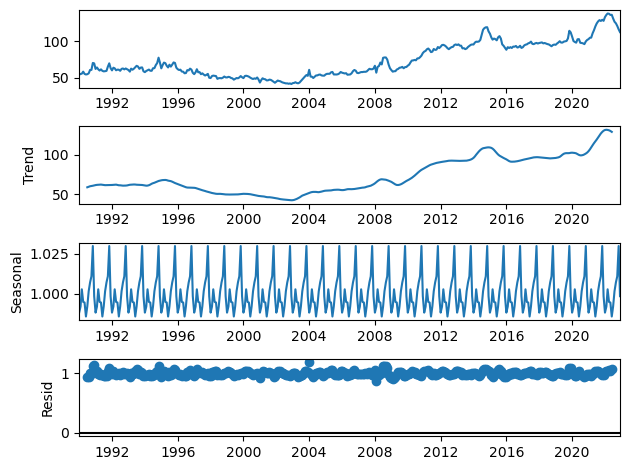

In [115]:
result = tsa.seasonal_decompose(data3, model='multiplicative', period = 12)
figure=result.plot()

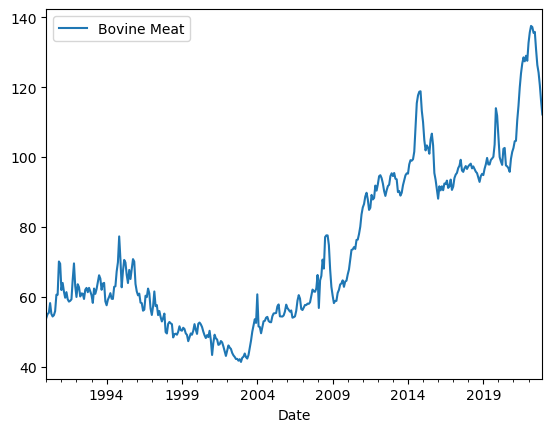

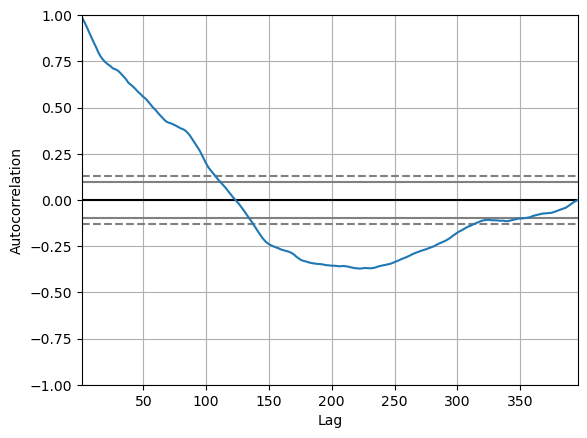

In [116]:
data3 = pd.read_excel('Meat_Price_Index.xlsx')
data3 = data3.tail(-1)
data3 = data3[['Date', 'Bovine Meat']]
data3 = data3.set_index('Date')
data3.plot()
plt.show()
autocorrelation_plot(data3)
plt.show()

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  396
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -930.380
Date:                              Sun, 23 Apr 2023   AIC                           1868.760
Time:                                      20:34:48   BIC                           1884.676
Sample:                                  01-01-1990   HQIC                          1875.066
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1359      0.036      3.810      0.000       0.066       0.206
ar.S.L12       0.88

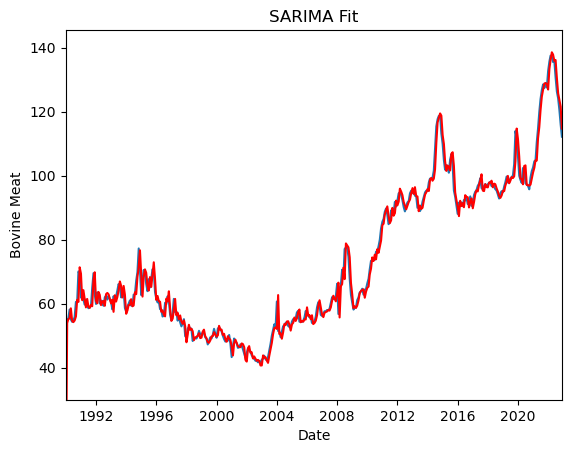

In [117]:
# Import data
data3 = pd.read_excel('Meat_Price_Index.xlsx')
data3 = data3.set_index('Date')
data3 = data3.dropna()
y = data3['Bovine Meat']

# Find the best SARIMA model using auto_arima
model1 = pm.auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model1.summary())

# Plot the fitted values and actual values
plt.plot(y)
plt.plot(model1.predict_in_sample(), color='red')
plt.title('SARIMA Fit')
plt.xlabel('Date')
plt.ylabel('Bovine Meat')
plt.xlim(data3.index[0], data3.index[-1]) # Define the range of values on the x-axis.
plt.ylim(30, None) # Limit the y-axis from 50
plt.show()

In [118]:
####fit model
p = 1 #number of lags
d = 1 #degree of differencing
q = 0 #size of the moving average window

model = tsa.arima.ARIMA(data3['Bovine Meat'], order=(p,d,q))
result = model.fit()

#summary of fit model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:            Bovine Meat   No. Observations:                  396
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -941.403
Date:                Sun, 23 Apr 2023   AIC                           1886.807
Time:                        20:34:48   BIC                           1894.765
Sample:                    01-01-1990   HQIC                          1889.960
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1173      0.035      3.373      0.001       0.049       0.185
sigma2         6.8805      0.333     20.647      0.000       6.227       7.534
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [119]:
data3 = data3[['Bovine Meat']]

ARIMA(1,1,0)

In [120]:
# Train the ARIMA model
p = 1
d = 1
q = 0

model = ARIMA(data3[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

# Make predictions on the test time series
# made by the model
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data3['2021-01-01':'2022-12-01']

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

MAE: 21.947292504430077
MSE: 593.3821303283472
RMSE: 24.359436166059904
R²: -4.311655888642174


C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)x(1, 0, 1, 12)

In [121]:
# Train the SARIMA model
p = 1
d = 1
q = 0
P = 1  # seasonal order
D = 0  # seasonal difference
Q = 1  # seasonal moving average order
s = 12  # seasonal period

model = SARIMAX(data3[:'2020-12-01'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Make predictions on the test time series
# made by the model
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data3['2021-01-01':'2022-12-01']

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 22.551570660916713
MSE: 618.3983484677549
RMSE: 24.867616461328875
R²: -4.535588386100792


LSTM RNN

In [122]:
# Loading the data
data3 = pd.read_excel('Meat_Price_Index.xlsx', parse_dates=['Date'], index_col='Date')

# Removing null values
data3.dropna(subset=['Bovine Meat'], inplace=True)

# Converting the date column to numerical values
data3['days_since'] = (data3.index - data3.index.min()).days

# Separating data into training and test sets
train_data, test_data = train_test_split(data3['Bovine Meat'], test_size=0.2, shuffle=False)

# Normalizing the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

# Preparing the data for the LSTM model
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data_scaled[i-60:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Creating the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Making predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Evaluating the model
mae = mean_absolute_error(test_data[60:], y_pred)
mse = mean_squared_error(test_data[60:], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[60:], y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

Epoch 1/50
4/4 [==============================] - 4s 58ms/step - loss: 0.0849
Epoch 2/50
4/4 [==============================] - 0s 58ms/step - loss: 0.0180
Epoch 3/50
4/4 [==============================] - 0s 58ms/step - loss: 0.0198
Epoch 4/50
4/4 [==============================] - 0s 60ms/step - loss: 0.0090
Epoch 5/50
4/4 [==============================] - 0s 60ms/step - loss: 0.0116
Epoch 6/50
4/4 [==============================] - 0s 60ms/step - loss: 0.0088
Epoch 7/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0065
Epoch 8/50
4/4 [==============================] - 0s 58ms/step - loss: 0.0068
Epoch 9/50
4/4 [==============================] - 0s 58ms/step - loss: 0.0055
Epoch 10/50
4/4 [==============================] - 0s 56ms/step - loss: 0.0054
Epoch 11/50
4/4 [==============================] - 0s 58ms/step - loss: 0.0055
Epoch 12/50
4/4 [==============================] - 0s 57ms/step - loss: 0.0051
Epoch 13/50
4/4 [==============================] - 0s 57ms/st

ARIMA/SARIMA in the base period 1990-2022 + 5-year projections (from 2023 to 2027)

In [123]:
start_date = data3.index[0]
end_date = pd.to_datetime('2027-12-01')
prediction = model_fit.predict(start=start_date, end=end_date, dynamic=True)

actuals = data3.loc[start_date:end_date, 'Bovine Meat']
mae = mean_absolute_error(actuals, prediction[-len(actuals):])
mse = mean_squared_error(actuals, prediction[-len(actuals):])
rmse = mean_squared_error(actuals, prediction[-len(actuals):], squared=False)
r2 = r2_score(actuals, prediction[-len(actuals):])
mape = mean_absolute_percentage_error(actuals, prediction[-len(actuals):])

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
print('MAPE:', mape)

MAE: 73.32358667767171
MSE: 5919.575438117837
RMSE: 76.93877720706143
R²: -9.897055232130203
MAPE: 1.0


Ovine Meat

In [124]:
data4 = pd.read_excel('Meat_Price_Index.xlsx')
data4 = data4.tail(-1)
data4 = data4[['Date', 'Ovine Meat']]
data4 = data4.set_index(data4['Date'])
data4 = data4.drop(['Date'], axis=1)

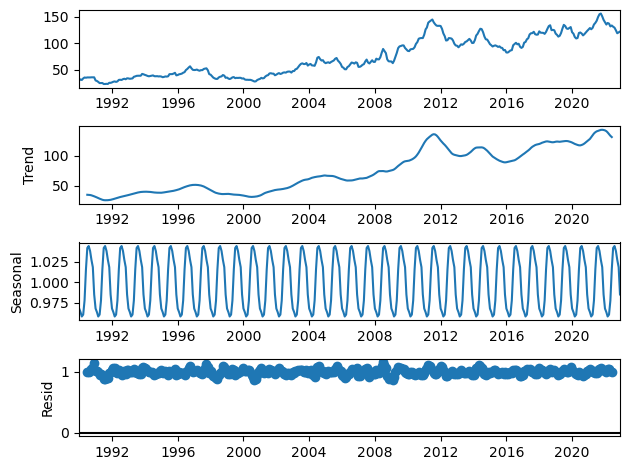

In [125]:
result = tsa.seasonal_decompose(data4, model='multiplicative', period = 12)
figure=result.plot()

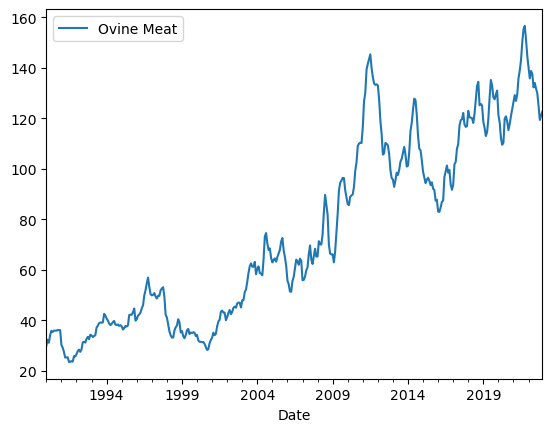

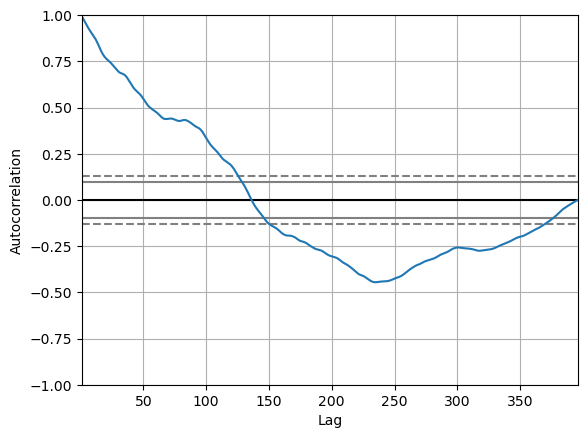

In [126]:
data4 = pd.read_excel('Meat_Price_Index.xlsx')
data4 = data4.tail(-1)
data4 = data4[['Date', 'Ovine Meat']]
data4 = data4.set_index('Date')
data4.plot()
plt.show()
autocorrelation_plot(data4)
plt.show()

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  396
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 12)   Log Likelihood                -985.008
Date:                             Sun, 23 Apr 2023   AIC                           1980.015
Time:                                     20:35:21   BIC                           1999.910
Sample:                                 01-01-1990   HQIC                          1987.898
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3808      0.055     25.134      0.000       1.273       1.489
ar.L2         -0.4391      

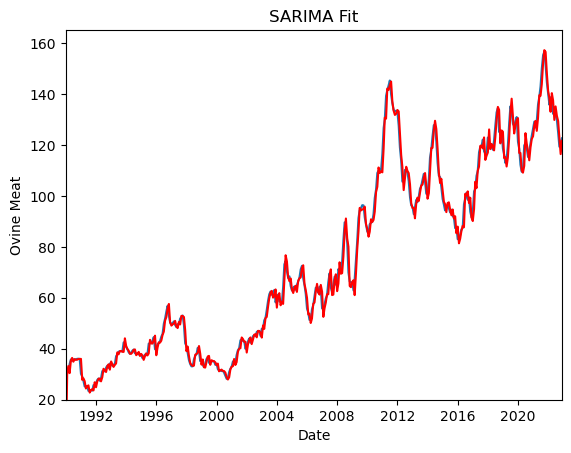

In [127]:
# Import data
data4 = pd.read_excel('Meat_Price_Index.xlsx')
data4 = data4.set_index('Date')
data4 = data4.dropna()
y = data4['Ovine Meat']

# Find the best SARIMA model using auto_arima
model1 = pm.auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model1.summary())

# Plot the fitted values and actual values
plt.plot(y)
plt.plot(model1.predict_in_sample(), color='red')
plt.title('SARIMA Fit')
plt.xlabel('Date')
plt.ylabel('Ovine Meat')
plt.xlim(data4.index[0], data4.index[-1]) # Define the range of values on the x-axis.
plt.ylim(20, None) # Limit the y-axis from 50
plt.show()

In [128]:
####fit model
p = 2 #number of lags
d = 1 #degree of differencing
q = 1 #size of the moving average window

model = tsa.arima.ARIMA(data4['Ovine Meat'], order=(p,d,q))
result = model.fit()

#summary of fit model
print(result.summary())

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Ovine Meat   No. Observations:                  396
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -988.429
Date:                Sun, 23 Apr 2023   AIC                           1984.858
Time:                        20:35:22   BIC                           2000.773
Sample:                    01-01-1990   HQIC                          1991.164
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3537      0.078     17.427      0.000       1.201       1.506
ar.L2         -0.4366      0.047     -9.331      0.000      -0.528      -0.345
ma.L1         -0.9107      0.071    -12.899      0.0

In [129]:
data4 = data4[['Ovine Meat']]

ARIMA(2,1,1)

In [130]:
# Train the ARIMA model
p = 2
d = 1
q = 1

model = ARIMA(data4[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

# Make predictions on the test time series
# made by the model
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data4['2021-01-01':'2022-12-01']

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-inv

MAE: 12.411258106924459
MSE: 246.04239521186432
RMSE: 15.685738593125423
R²: -1.3382525656454178


SARIMAX(2, 1, 1)x(1, 0, [], 12)

In [131]:
# Train the SARIMA model
p = 2
d = 1
q = 1
P = 1  # seasonal order
D = 0  # seasonal difference
Q = []  # seasonal moving average order
s = 12  # seasonal period

model = SARIMAX(data4[:'2020-12-01'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Make predictions on the test time series
# made by the model
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data4['2021-01-01':'2022-12-01']

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 14.231124870032495
MSE: 301.4303096413658
RMSE: 17.36174846152788
R²: -1.8646290582373162


LSTM RNN

In [132]:
# Loading the data
data4 = pd.read_excel('Meat_Price_Index.xlsx', parse_dates=['Date'], index_col='Date')

# Removing null values
data4.dropna(subset=['Ovine Meat'], inplace=True)

# Converting the date column to numerical values
data4['days_since'] = (data4.index - data4.index.min()).days

# Separating data into training and test sets
train_data, test_data = train_test_split(data4['Ovine Meat'], test_size=0.2, shuffle=False)

# Normalizing the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

# Preparing the data for the LSTM model
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data_scaled[i-60:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Creating the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Making predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Evaluating the model
mae = mean_absolute_error(test_data[60:], y_pred)
mse = mean_squared_error(test_data[60:], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[60:], y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

Epoch 1/50
4/4 [==============================] - 4s 59ms/step - loss: 0.0810
Epoch 2/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0211
Epoch 3/50
4/4 [==============================] - 0s 59ms/step - loss: 0.0159
Epoch 4/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0114
Epoch 5/50
4/4 [==============================] - 0s 64ms/step - loss: 0.0140
Epoch 6/50
4/4 [==============================] - 0s 62ms/step - loss: 0.0086
Epoch 7/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0083
Epoch 8/50
4/4 [==============================] - 0s 63ms/step - loss: 0.0088
Epoch 9/50
4/4 [==============================] - 0s 63ms/step - loss: 0.0069
Epoch 10/50
4/4 [==============================] - 0s 62ms/step - loss: 0.0072
Epoch 11/50
4/4 [==============================] - 0s 62ms/step - loss: 0.0068
Epoch 12/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0063
Epoch 13/50
4/4 [==============================] - 0s 59ms/st

1/1 [==============================] - 1s 1s/step
MAE: 7.317559539739261
MSE: 95.7503375784481
RMSE: 9.785210144828168
R²: 0.14414845160469825


ARIMA/SARIMA in the base period 1990-2022 + 5-year projections (from 2023 to 2027)

In [133]:
start_date = data4.index[0]
end_date = pd.to_datetime('2027-12-01')
prediction = model_fit.predict(start=start_date, end=end_date, dynamic=True)

actuals = data4.loc[start_date:end_date, 'Ovine Meat']
mae = mean_absolute_error(actuals, prediction[-len(actuals):])
mse = mean_squared_error(actuals, prediction[-len(actuals):])
rmse = mean_squared_error(actuals, prediction[-len(actuals):], squared=False)
r2 = r2_score(actuals, prediction[-len(actuals):])
mape = mean_absolute_percentage_error(actuals, prediction[-len(actuals):])

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
print('MAPE:', mape)

MAE: 74.27751848016281
MSE: 6866.858722255631
RMSE: 82.86651146425575
R²: -4.08765880008346
MAPE: 1.0
